## Dinosaur EDA & ML: Analysis of Dinosaur Diets, Size, & More - DataHacks 2024

Author: Shawn Cheng

Created for DataHacks 2024, 4/6/2024 - 4/7/2024

<div>
<img src="ds3_dino_background.png" width="1000"/>
</div>

This project aims to perform data analysis on the dataset *[Jurassic Park - The Exhaustive Dinosaur Dataset](https://www.kaggle.com/datasets/kjanjua/jurassic-park-the-exhaustive-dinosaur-dataset)* to make helpful conclusions about dinosaurs that can help us find out more about these fascinating creatures. After our analysis, we will use machine learning to implement a dinosaur type prediction model. The project will be split into two sections: the first section will be the exploratory data analysis of the dataset, and the second section will train a machine learning model to predict the type of a dinosaur based on some given information.

## Data Preview
Before looking at our objectives, let's familiarize ourselves with the data first. The dataset contains 10 columns:

1. `name` - the name of the dinosaur
2. `diet` - the diet of the dinosaur (herbivorous, carnivorous, or omnivorous)
3. `period` - the period in which the dinosaur existed (name of the period and years ago)
4. `lived_in` - the area which the dinosaur lived in
5. `type` - the type of the dinosaur
6. `length` - the length of the dinosaur
7. `taxonomy` - the taxonomy of the dinosaur
8. `named_by` - the people who named this dinosaur
9. `species` - the species the dinosaur belongs to
10. `link` - the website containing the information of the dinosaur


## Section 1: Dinosaur EDA
We will first do some exploratory data analysis (EDA) and make hypotheses and draw conclusions from this dataset. Here are our objectives:

#### 1. **Explore the diet of the dinosaurs**
- a) Find how or if `diet` affects the `length` of a dinosaur.
- b) Observe how `diet` and changes over time. Do dinosaurs adopt different diets over time?
- c) Explore the relationship between `diet` and `lived_in`. Are some diets more prominent than others depending on location?

#### 2. **Compare giant and small dinosaurs**
- a) Extract the top 5 largest and smallest dinosaurs in terms of `length`.
- b) Explore the relationship between `length` and `period`. Does the length of dinosaurs change over time?

### Setup, Loading, and Cleaning Data
Before we can begin analyzing the data, let's import the libraries we'll need to use, and load and clean our data.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load data
dino_df_raw = pd.read_csv("dino_data.csv")
dino_df_raw.head()

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...


We can set the index to the `name` column, since name is unique, and remove the `link` column. We'll also need to adjust the `period` column to make our later analysis easier.

In [3]:
dino_df = dino_df_raw.set_index("name").drop(columns = ["link"])
dino_df.head()

,diet,period,lived_in,type,length,taxonomy,named_by,species
name,,,,,,,,
aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae
abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis
achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri
achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus
acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis


The `period` column currently contains two pieces of information:

1. The time period's name
2. The amount of years ago, in millions, in which the dinosaur existed

Let's seperate these two columns into `period` for the time period, and `mya` for the amount of million years ago the dinosaurs existed.

In [4]:
mya_idx = 2
period_earliness_idx = 0
period_idx = 1

dino_df["mya"] = dino_df["period"].str.split(" ", expand = True)[mya_idx] # Split the string enties in the period column and get the mya substring
dino_df["period"] = dino_df["period"].str.split(" ", expand = True)[period_earliness_idx] + " " + dino_df["period"].str.split(" ", expand = True)[period_idx] # Split the string entries in the period column again and get the period substrings
dino_df = dino_df[["diet", "period", "mya", "lived_in", "type", "length", "taxonomy", "species", "named_by"]] # Reorganize the columns
dino_df

,diet,period,mya,lived_in,type,length,taxonomy,species,named_by
name,,,,,,,,,
aardonyx,herbivorous,Early Jurassic,199-189,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,celestae,Yates Bonnan Neveling Chinsamy and Blackbeard ...
abelisaurus,carnivorous,Late Cretaceous,74-70,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,comahuensis,Bonaparte and Novas (1985)
achelousaurus,herbivorous,Late Cretaceous,83-70,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,horneri,Sampson (1995)
achillobator,carnivorous,Late Cretaceous,99-84,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,giganteus,Perle Norell and Clark (1999)
acrocanthosaurus,carnivorous,Early Cretaceous,115-105,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,atokensis,Stovall and Langston (1950)
...,...,...,...,...,...,...,...,...,...
yuanmousaurus,herbivorous,Mid Jurassic,180-159,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,jiangyiensis,Lü Li Ji Wang Zhang and Dong (2006)
yunnanosaurus,omnivorous,Early Jurassic,205-190,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,huangi,Young (1942)
zalmoxes,herbivorous,Late Cretaceous,69,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,robustus,Nopcsa (1902)


Almost done, however, the entries in the `length` column are currently strings, and some entries are invalid, such as the entry in the last row. Let's convert all proper entires to a number format, and replace invalid entries with -1.0 to represent an unknown height.

In [5]:
dino_df["length"] = dino_df["length"].fillna("-1.0m")
dino_df["length"] = dino_df.get("length").str[:-1]
dino_df = dino_df.astype({"length": float})
dino_df

,diet,period,mya,lived_in,type,length,taxonomy,species,named_by
name,,,,,,,,,
aardonyx,herbivorous,Early Jurassic,199-189,South Africa,sauropod,8.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,celestae,Yates Bonnan Neveling Chinsamy and Blackbeard ...
abelisaurus,carnivorous,Late Cretaceous,74-70,Argentina,large theropod,9.0,Dinosauria Saurischia Theropoda Neotheropoda C...,comahuensis,Bonaparte and Novas (1985)
achelousaurus,herbivorous,Late Cretaceous,83-70,USA,ceratopsian,6.0,Dinosauria Ornithischia Genasauria Cerapoda Ma...,horneri,Sampson (1995)
achillobator,carnivorous,Late Cretaceous,99-84,Mongolia,large theropod,5.0,Dinosauria Saurischia Theropoda Neotheropoda T...,giganteus,Perle Norell and Clark (1999)
acrocanthosaurus,carnivorous,Early Cretaceous,115-105,USA,large theropod,12.0,Dinosauria Saurischia Theropoda Neotheropoda T...,atokensis,Stovall and Langston (1950)
...,...,...,...,...,...,...,...,...,...
yuanmousaurus,herbivorous,Mid Jurassic,180-159,China,sauropod,17.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,jiangyiensis,Lü Li Ji Wang Zhang and Dong (2006)
yunnanosaurus,omnivorous,Early Jurassic,205-190,China,sauropod,7.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,huangi,Young (1942)
zalmoxes,herbivorous,Late Cretaceous,69,Romania,euornithopod,3.0,Dinosauria Ornithischia Genasauria Cerapoda Or...,robustus,Nopcsa (1902)


Now that `dino_df` is cleaned and organized, we can begin our analysis.

### 1. Exploring the diet of the dinosaurs

#### a) Relationship between `diet` and `length`
To analyze the relationship between `diet` and `length`, we can first find the average length of dinosaurs for each diet, then graph the two columns with a bar chart and see what the relationship is.

In [6]:
by_diet = dino_df[["diet", "length"]] # Get only the diet and length columns
by_diet = by_diet[by_diet.get("length") != -1.0] # Keep only the dinosaurs who have known lengths
by_diet = by_diet.groupby("diet").mean() # Get the average height for each type of diet
by_diet

,length
diet,
carnivorous,5.193696
herbivorous,8.898824
herbivorous/omnivorous,5.150000
omnivorous,3.651852
unknown,1.000000


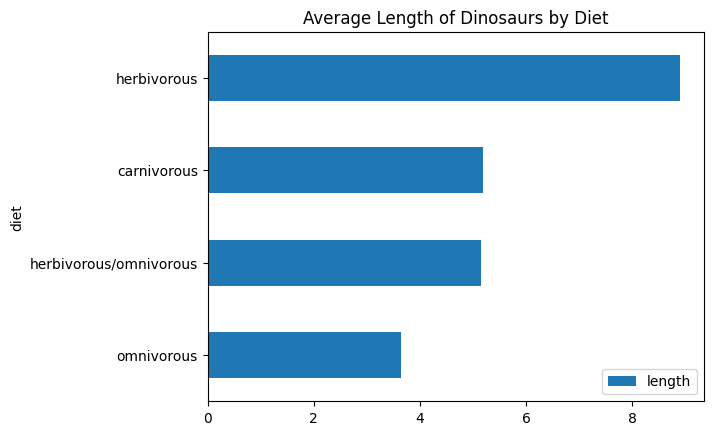

In [7]:
# Ignore last row in by_diet because it is not helpful, and create a horizontal bar chart of the average length of dinosaurs by their diet
by_diet[:-1].sort_values(ascending = True, by = "length").plot(kind = "barh", title = "Average Length of Dinosaurs by Diet");

As we can see from the bar chart above, it seems like dinosaurs that are solely herbivores are significantly greater in length than dinosaurs following other diets. Interestingly, this pattern seems pretty consistent with the animals in today's world, as giant animals such as hippos, elephants, and pandas, are all herbivores.

#### b) Relationship between `diet` and time
To analyze the relationship between `diet` and time, we can create a scatter plot comparing `diet` and `mya`. First, let's remind ourselves of what `dino_df` looks like.

In [8]:
dino_df.head()

,diet,period,mya,lived_in,type,length,taxonomy,species,named_by
name,,,,,,,,,
aardonyx,herbivorous,Early Jurassic,199-189,South Africa,sauropod,8.0,Dinosauria Saurischia Sauropodomorpha Prosauro...,celestae,Yates Bonnan Neveling Chinsamy and Blackbeard ...
abelisaurus,carnivorous,Late Cretaceous,74-70,Argentina,large theropod,9.0,Dinosauria Saurischia Theropoda Neotheropoda C...,comahuensis,Bonaparte and Novas (1985)
achelousaurus,herbivorous,Late Cretaceous,83-70,USA,ceratopsian,6.0,Dinosauria Ornithischia Genasauria Cerapoda Ma...,horneri,Sampson (1995)
achillobator,carnivorous,Late Cretaceous,99-84,Mongolia,large theropod,5.0,Dinosauria Saurischia Theropoda Neotheropoda T...,giganteus,Perle Norell and Clark (1999)
acrocanthosaurus,carnivorous,Early Cretaceous,115-105,USA,large theropod,12.0,Dinosauria Saurischia Theropoda Neotheropoda T...,atokensis,Stovall and Langston (1950)


The format for the `mya` column is currently hard to work with, as it is still a string, and contains an interval the millions of years ago, rather than just a single value. Let's make a DataFrame with the `mya` column in a format that is easier to work with. To do this, let's take the average of each entry in `mya` and convert it to a number.

In [9]:
dino_formatted_mya = dino_df[["diet", "mya", "length"]] # We only need the diet and mya columns
dino_formatted_mya = dino_formatted_mya.assign(mya_start = dino_formatted_mya["mya"].str.split("-", expand = True)[0]) # Get start of mya interval
dino_formatted_mya = dino_formatted_mya.assign(mya_end = dino_formatted_mya["mya"].str.split("-", expand = True)[1]) # Get end of mya interval
dino_formatted_mya["mya_end"] = dino_formatted_mya["mya_end"].fillna(dino_formatted_mya["mya_start"]) # If there is just one value, set end equal to the start
dino_formatted_mya = dino_formatted_mya.dropna() # Drop any rows that still have missing values
dino_formatted_mya = dino_formatted_mya.astype({"mya_start": int, "mya_end": int}) # Convert mya_start and mya_end column values to an integer
dino_formatted_mya["mya"] = (dino_formatted_mya["mya_start"] + dino_formatted_mya["mya_end"]) / 2 # Assign the mya column to be the average of the mya interval
dino_formatted_mya_diet = dino_formatted_mya[["diet", "mya"]] # Drop mya_start and mya_end columns

dino_formatted_mya_diet

,diet,mya
name,,
aardonyx,herbivorous,194.0
abelisaurus,carnivorous,72.0
achelousaurus,herbivorous,76.5
achillobator,carnivorous,91.5
acrocanthosaurus,carnivorous,110.0
...,...,...
yuanmousaurus,herbivorous,169.5
yunnanosaurus,omnivorous,197.5
zalmoxes,herbivorous,69.0


Now that the entries in `mya` are numbers, we can plot `diet` against `mya`.

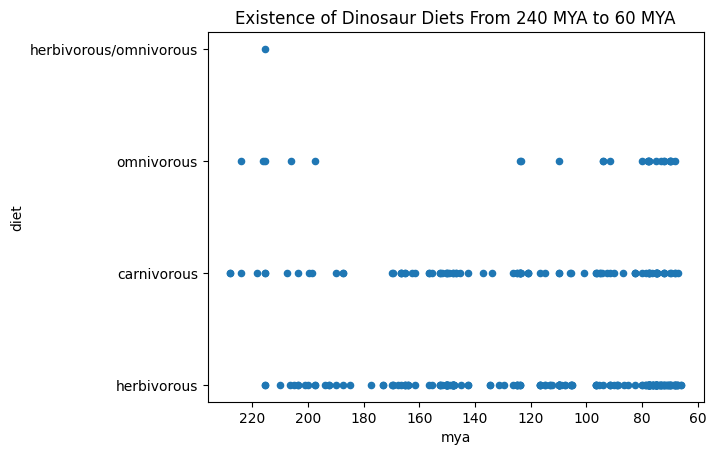

In [10]:
#dino_formatted_mya[dino_formatted_mya.get("diet") == "herbivorous"].groupby("mya").count().reset_index().plot(kind = "scatter", x = "mya", y = "diet")
dino_formatted_mya_diet[dino_formatted_mya_diet.get("diet") != "unknown"].plot(kind = "scatter", x = "mya", y = "diet", title = "Existence of Dinosaur Diets From 240 MYA to 60 MYA").invert_xaxis()

Looking at the graph above, it seems like **herbivorous and carnivorous** dinosaur species continued to exist for the whole timeline from **220 to 60 million years ago**, but **ominvorous** dinosaur species disappeared about **190 million years ago**, reappearing roughly 60 million years later at **130 million years ago**.

#### c) Relationship between `diet` and `lived_in`
To analyze the relationship between `diet` and `lived_in`, we can use pie charts to see which the distribution of countries across the diets. Since there are numerous countries from which the dinosaurs have lived in, for each `diet` type, we will only display at most the top 10 countries that had the most population of dinosaurs of that diet. We will ignore the "unknown" and "herbivorous/omnivorous" diet types since there is too little data on dinosaurs of those diet types.

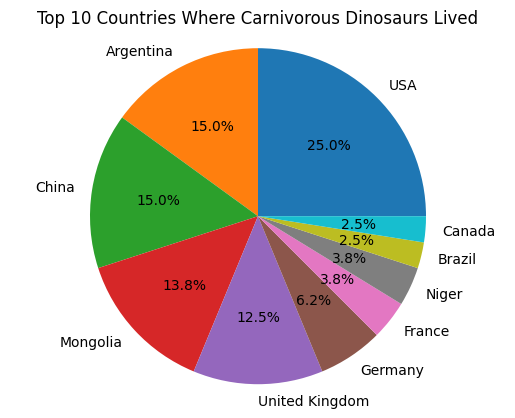

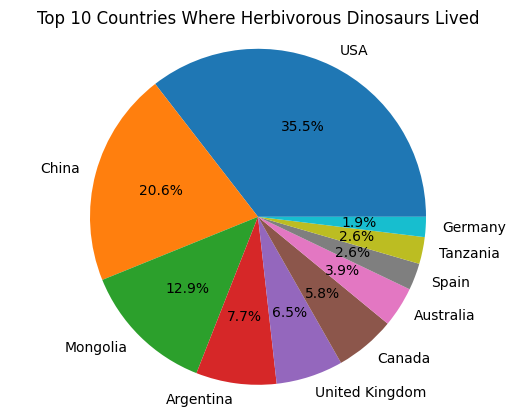

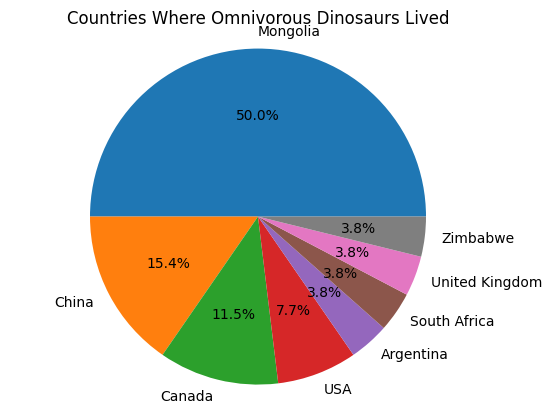

In [11]:
diet_common_location = dino_df[["diet", "lived_in"]][(dino_df.get("diet") != "unknown") & (dino_df.get("diet") != "herbivorous/omnivorous")] # Ignore "unknown" and "herbivorous/omnivorous" diet types
diet_common_location = diet_common_location.groupby("diet")["lived_in"].value_counts() # Group by diet, counting the amount of dinosaur species in each available country

# Loop through the diet_common_location DataFrame to plot pie charts for each diet
for diet, location_counts in diet_common_location.groupby(level = 0):
    top_locations = location_counts.head(10) # Get at most 10 countries
    plt.figure()
    plt.pie(top_locations, labels = list(map(lambda tup: tup[1], top_locations.index)), autopct = '%1.1f%%') # Create the pie chart
    if location_counts.size > 10:
        plt.title(f'Top 10 Countries Where {diet.title()} Dinosaurs Lived')
    else:
        plt.title(f"Countries Where {diet.title()} Dinosaurs Lived")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

We can observe from the pie charts above that dinosaurs have lived in locations all across the world, but popular locations amongst the three pie charts above include the **United States**, **China**, and **Mongolia**.

### 2. Comparing large and small dinosaurs

#### a) Finding the top 5 longest and shortest dinosaurs
To do this, let's sort `dino_df` by height and extract the top 5 and bottom 5 rows of the DataFrame.

In [12]:
dino_sorted = dino_df[dino_df.get("length") != -1.0].sort_values(ascending = False, by = "length")
top_5_length = dino_sorted.head(5)
bottom_5_length = dino_sorted.tail(5)

In [13]:
top_5_length

,diet,period,mya,lived_in,type,length,taxonomy,species,named_by
name,,,,,,,,,
argentinosaurus,herbivorous,Late Cretaceous,90,Argentina,sauropod,35.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,huinculensis,Bonaparte and Coria (1993)
supersaurus,herbivorous,Early Cretaceous,154-142,USA,sauropod,35.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,vivianae,Jansen (1985)
brachiosaurus,herbivorous,Late Jurassic,155-140,USA,sauropod,30.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,altithorax,Riggs (1903)
paralititan,herbivorous,Late Cretaceous,99-94,Egypt,sauropod,28.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,stromeri,Smith Lamanna Lacovara Dodson Smith Poole Gieg...
diplodocus,herbivorous,Late Jurassic,155-145,USA,sauropod,26.0,Dinosauria Saurischia Sauropodomorpha Sauropod...,longus,Marsh (1878)


In [14]:
bottom_5_length

,diet,period,mya,lived_in,type,length,taxonomy,species,named_by
name,,,,,,,,,
shuvuuia,omnivorous,Late Cretaceous,75-81,Mongolia,small theropod,0.60,Dinosauria Saurischia Theropoda Neotheropoda T...,deserti,Chiappe Norell and Clark (1998)
microceratus,herbivorous,Late Cretaceous,86-66,Mongolia,ceratopsian,0.50,Dinosauria Ornithischia Genasauria Cerapoda Ma...,gobiensis,Bohlin (1953)
archaeopteryx,carnivorous,Late Jurassic,147,Germany,small theropod,0.50,Dinosauria Saurischia Theropoda Neotheropoda T...,lithographica,Mayer (1861)
shanag,carnivorous,Early Cretaceous,126-142,Mongolia,small theropod,0.45,Dinosauria Saurischia,ashile,Turner Hwang and Norell (2007)
confuciusornis,carnivorous,Early Cretaceous,127-121,China,small theropod,0.25,Dinosauria Saurischia Theropoda Neotheropoda T...,sanctus,Hou Zhou Gu and Zhang (1995)


We can see from the above DataFrames that the longest dinosaurs could have reached lengths of **35 meters**, and the shortest dinosaurs all had lengths of **less than 1 meter**. It is also worth noting that the longest dinosaurs were all herbivorous, which is consistent with our results in comparing `diet` and `length` from earlier. However, we can see that the top 5 longest dinosaurs were all of the sauropod `type`. Looking at what sauropods could have looked like...

<div>
<img src="sauropod.jpeg" width="500"/>
</div>

It is no surprise as to why sauropods were the longest of all the dinosaurs, given their insanely lengthy necks. Now, looking at the top 5 shortest dinosaurs, we can see that most of them were carnivorous, and most of them were also of the small theropod `type`. Looking at what small theropods could have looked like...

<div>
<img src="small_theropod.jpeg" width="500"/>
</div>

We can see that small theropods have a body structure similar to that of a chicken's, and this body structure explains what gives small theropods their shape.

#### b) Does the overall length of dinosaurs change over time?
To answer this question, we can plot the average length of dinosaurs over `mya`. We will first need to format `mya` again, so we can just use the `dino_formatted_mya` DataFrame created previously.

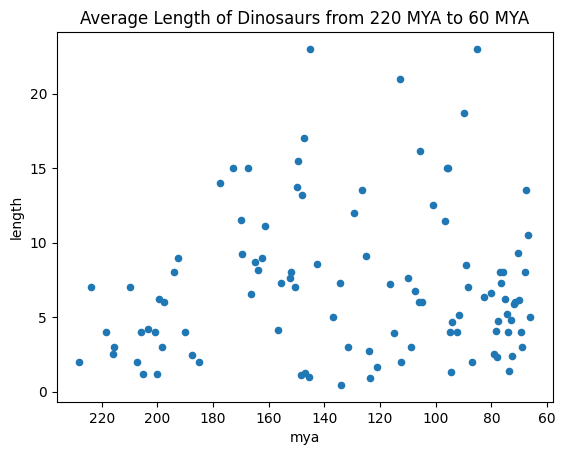

In [15]:
dino_formatted_mya_length = dino_formatted_mya[dino_formatted_mya.get("length") != -1.0] # Filter out dinosaurs with unknown lengths
dino_formatted_mya_length =  dino_formatted_mya_length[["mya", "length"]].groupby("mya").mean() # Group dinosaurs by mya and take the average of length for each mya entry

# Plot dino_formatted_mya_length
dino_formatted_mya_length.reset_index().plot(kind = "scatter", x = "mya", y = "length", title = "Average Length of Dinosaurs from 220 MYA to 60 MYA").invert_xaxis();

Interesting! It seems like for the beginning of the graph, from **240 MYA to 180 MYA**, dinosaur species were all **less than 10 meters** in length, but **after 180 MYA**, lengthier dinosaur species started emerging.

## Section 2: Dinosaur Type Predictor
Now that we've done some EDA, let's train a machine learning model that will be able to predict a dinosaur's `type` give some information about a dinosaur. We will use the scikit-learn library to train a classifier to do this. Let's begin by importing scikit-learn.

In [16]:
# Import scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report
from sklearn import preprocessing

Now, we need to clean and setup the training data. Let's remove all invalid lengths first.

In [17]:
# Set up training data
dino_valid_lens_df = dino_df[dino_df.get("length") != -1.0]
X = dino_valid_lens_df[["length", "lived_in"]]
y = dino_valid_lens_df[["type"]]

Now that our data is cleaned, we need to split the data into two sets: training and testing data. However, before we do that, we need to get all of our data into a numerical format first, as our classifier will not be able to understand categorical string values. We can transform these string values into numerical values for the classifer to understand through one hot encoding.

In [18]:
# Use a label encoder to set up data for one hot encoding
le = preprocessing.LabelEncoder()
X_label_encoded = X.apply(le.fit_transform)

# Use a one hot encoder to transform the data
one_hot_enc = preprocessing.OneHotEncoder()
one_hot_enc.fit(X_label_encoded)
one_hot_labels = one_hot_enc.transform(X_label_encoded).toarray()

# Add the one hot encoded data and clean that training data
X = pd.concat([X.reset_index(), pd.DataFrame(one_hot_labels)], axis = 1)
X = X.drop(columns = ["lived_in", "name"])
X = X.astype(int)
X.columns = X.columns.astype(str)

Now that all of our data is correctly formatted, let's split the data.

In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

We are now ready to train our classifer model. Let's use a `RandomTreesClassifer` and train it. Then, let's evalutate the model.

In [20]:
dino_type_classifier = RandomForestClassifier()

dino_type_classifier.fit(X_train, y_train)
y_pred = dino_type_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

armoured dinosaur       0.17      0.14      0.15         7
      ceratopsian       0.00      0.00      0.00         3
     euornithopod       0.43      0.27      0.33        11
   large theropod       0.43      0.55      0.48        11
         sauropod       0.83      0.67      0.74        15
   small theropod       0.64      0.75      0.69        12

         accuracy                           0.49        59
        macro avg       0.42      0.40      0.40        59
     weighted avg       0.52      0.49      0.50        59



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [21]:
print("Accuracy: ", dino_type_classifier.score(X, y) * 100, "%")

Accuracy:  78.00687285223368 %


Cool! From just using the `length` and `lived_in` columns, we have trained the classifier model to correctly identify the type of a dinosaur with about 77 - 78% accuracy! This accuracy can be further improved by using additional columns, but for just using two columns, this accuracy is good.